### Importing libraries & data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
categorical = pd.read_csv('categorical_c.csv')
numerical = pd.read_csv('numerical_c.csv')
targets = pd.read_csv('target.csv')

In [3]:
for col in categorical.columns:
    categorical[col] = categorical[col].astype('object')

In [4]:
all_data = pd.concat((categorical,numerical,targets),axis=1)
print(all_data.shape)
all_data.head()

(95412, 95)


,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM,HV3,HV4,ANC6,MHUC2,HPHONE_D,RFA_2F,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,CARDPROM,CONTROLN,CLUSTER2,TARGET_B,TARGET_D
0,IL,36,H,F,3,E,C,T,2,8,2,12,11,3,2,0,2,0,4,60.000000,5,9,34,18,5,0,35,65,92,1,49,97,95,2,0,0,479,635,86,14,7,80,70,84,50,2,7,13,27,47,0,61,0,0,0,2,5,17,73,0.0,177.0,13,51,46,54,13,45,64,64,62,53,99,0,34,18,74,88,77,31,14,14,31,54,46,90,10,33,65,40,6,27,95515,39,0,0.0
1,CA,14,H,M,3,G,A,S,1,10,12,12,10,12,10,1,4,0,2,46.000000,6,9,55,11,9,99,0,0,67,0,75,99,99,0,0,0,5468,5218,96,4,9,94,88,95,44,97,98,98,98,99,94,83,0,0,0,91,91,91,94,4480.0,13.0,2,66,56,44,2,71,83,81,64,57,99,99,55,11,39,50,92,10,26,56,97,99,0,96,4,99,0,99,20,12,148535,1,0,0.0
2,NC,43,U,M,3,E,C,R,2,11,7,12,1,2,1,0,2,1,4,61.611649,3,1,29,33,1,0,2,98,96,2,44,69,69,6,5,3,497,546,78,22,18,76,65,86,60,0,1,6,18,50,0,36,2,24,3,0,2,9,44,0.0,281.0,32,31,38,62,21,61,73,70,78,62,82,99,28,32,84,96,65,22,12,23,50,69,31,0,35,22,77,17,9,26,15078,60,0,0.0
3,CA,44,U,F,3,E,C,R,2,11,11,12,2,2,1,0,2,1,4,70.000000,1,4,14,31,0,0,8,92,61,0,50,85,83,4,1,0,1000,1263,48,52,6,73,61,84,36,10,25,50,69,92,10,42,0,9,0,1,8,17,34,9340.0,67.0,27,26,46,54,17,43,81,68,33,31,0,99,14,31,67,56,43,38,10,19,39,45,55,45,17,23,77,22,16,27,172556,41,0,0.0
4,FL,16,H,F,3,F,A,S,2,10,1,1,3,4,3,0,2,1,2,78.000000,3,2,9,53,9,99,0,0,2,98,57,99,98,0,0,0,576,594,90,10,0,82,49,92,1,0,1,2,16,67,0,45,0,0,0,25,58,74,83,5000.0,127.0,24,11,20,80,1,76,73,65,80,31,81,99,9,53,65,99,45,34,1,3,6,33,67,9,72,99,1,21,6,43,7112,26,0,0.0


- I will eliminate who didn't donate because it is a big amount, I want to build a model only with who donated
- Then I will check the TARGET_D column for outliers

In [5]:
donated = pd.DataFrame(all_data[all_data['TARGET_B'] == 1]['TARGET_D'])
donated.describe()

,TARGET_D
count,4843.000000
mean,15.624344
std,12.445137
min,1.000000
25%,10.000000
50%,13.000000
75%,20.000000
max,200.000000


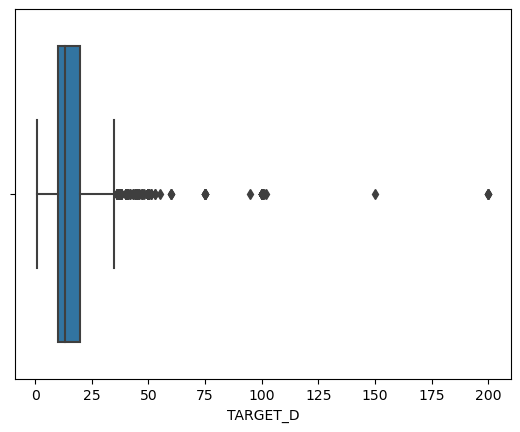

In [6]:
sns.boxplot(x=donated['TARGET_D'])
plt.show()

In [7]:
print('if I choose iqr_75 for upper limit for my outliers I will loose: ', len(donated.loc[donated.TARGET_D >20, 'TARGET_D']), 'rows')
print('if I choose 40 for upper limit for my outliers I will loose: ', len(donated.loc[donated.TARGET_D >40, 'TARGET_D']), 'rows')

if I choose iqr_75 for upper limit for my outliers I will loose:  950 rows
if I choose 40 for upper limit for my outliers I will loose:  139 rows


- I will remove outliers above 40, then I will loose very few rows

In [8]:
all_data_c = all_data[(all_data['TARGET_B'] != 0)  & (all_data['TARGET_D']<=40)]
all_data_c = all_data_c.sample(frac =1)
all_data_c.shape

(4704, 95)

In [9]:
# going to drop TARGET_B column because I already selected the ones who donated
data = all_data_c.drop(columns=['TARGET_B'], axis=1)

#### I will do X-y split and scale-transform my data for linear regression model

In [10]:
# X/y split
X = data.drop('TARGET_D',axis = 1)
y = data['TARGET_D']

In [11]:
#train-test-split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default fraction is .2

In [12]:
#splitting into categorical and numerical
X_train_num = X_train.select_dtypes(include=np.number)
X_train_cat = X_train.select_dtypes(include = object)


X_test_num = X_test.select_dtypes(include=np.number)
X_test_cat = X_test.select_dtypes(include = object)


- for both scaling and encoding, I will fit it to my train set, use the same transformer to my test set

In [13]:
#scale numericals
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num) 
numericals_train_scaled = transformer.transform(X_train_num)
numericals_test_scaled = transformer.transform(X_test_num)


In [14]:
#encode categoricals
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat)
categoricals_train_encoded = encoder.transform(X_train_cat).toarray()
categoricals_test_encoded = encoder.transform(X_test_cat).toarray()

In [15]:
X_train = np.concatenate((numericals_train_scaled,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_scaled,categoricals_test_encoded),axis=1)

#### Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
predictions_test = lm.predict(X_test)
r2_score = r2_score(y_test, predictions_test) 

- I will apply cross validation to my model

In [18]:
from sklearn.model_selection import cross_validate

results = cross_validate(lm,X_train, y_train, cv = 5)

In [19]:
print(results['test_score'])
print(results['test_score'].mean())

[ 4.72652764e-01 -1.07979244e+04  4.80186961e-01  5.16917186e-01
  4.70074932e-01]
-2159.196918395225


- Some metrics about the model

In [20]:
print('r2 score for the model: ', r2_score)
print('mean squared error: ', mean_squared_error(y_test,predictions_test))
print('square root of mean squared error: ', np.sqrt(mean_squared_error(y_test,predictions_test)))
print('mean absolute error:', mean_absolute_error(y_test, predictions_test))

r2 score for the model:  0.47259152059610154
mean squared error:  28.35672138897753
square root of mean squared error:  5.325102946326721
mean absolute error: 3.8239141451258236


In [21]:
y_test.mean()

13.779336734693878

In [22]:
predictions_test.mean()

14.329439487587027

In [23]:
import pickle
confusion_matrix = pickle.load(open('confusion_matrix.p', 'rb'))
classification_accuracy = pickle.load(open('ran_for_accuracy.p', 'rb'))
print('For the classification model we built before, here are some metrics')
print('classification accuracy',classification_accuracy,"\n",'precision score:', confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]),"\n",'confusion matrix',"\n",confusion_matrix) 

For the classification model we built before, here are some metrics
classification accuracy 0.6190893041047522 
 precision score: 0.5746714456391876 
 confusion matrix 
 [[12987  9612]
 [  539   715]]


### addition: comparing different models
- this shows linear regression model is the most suitable

In [24]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model2 = lm
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()
from sklearn.model_selection import cross_val_score


model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN']

val_scores = {}

for model, model_name in zip(model_pipeline,model_names):
    model.fit(X_train, y_train)
    val_scores[model_name] = model.score(X_test,y_test)
print(val_scores)

{'Decision Tree Regressor': -0.025420753536810947, 'Linear Regression': 0.47259152059610154, 'KNN': 0.10566849697251102}


- First of all, I tried to predict who will donate. I compared 2 supervised ML classification models: RandomForestClassifier and Logistic Regression. I chose Random Forest Classifier. >> accuracy is 0.61
- Within the people who donated before, I compared 3 regression models and I choose Linear Regression.  >>  r2 score is 0.45

### Now I will apply my models to the dataset

In [25]:
### first I will apply Random Forest Classifier

In [26]:
# X/y split
X = all_data.drop(['TARGET_D','TARGET_B'],axis = 1)
y = all_data['TARGET_B']
X.shape

(95412, 93)

In [27]:
#splitting into categorical and numerical
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include= object)

In [28]:
#scale numericals
from sklearn.preprocessing import MinMaxScaler
numericals_scaled = MinMaxScaler().fit_transform(X_num) 

In [29]:
#encode categoricals
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
categoricals_encoded = encoder.transform(X_cat).toarray()

In [30]:
X = np.concatenate((numericals_scaled,categoricals_encoded),axis=1)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246
0,0.608247,0.666667,1.000000,0.343434,0.181818,0.555556,0.000000,0.353535,0.656566,0.929293,0.010101,0.494949,0.979798,0.959596,0.020202,0.000000,0.000000,0.079833,0.105833,0.868687,0.141414,0.070707,0.808081,0.707071,0.848485,0.505051,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.616162,0.000000,0.000000,0.000000,0.020202,0.050505,0.171717,0.737374,0.000000,0.271889,0.131313,0.515152,0.464646,0.545455,0.131313,0.454545,0.646465,0.646465,0.626263,0.535354,1.000000,0.000000,0.343434,0.181818,0.747475,0.888889,0.777778,0.596154,0.141414,0.141414,0.313131,0.545455,0.464646,0.909091,0.101010,0.333333,0.656566,0.404040,0.285714,0.433333,0.498045,0.622951,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.463918,0.833333,1.000000,0.555556,0.111111,1.000000,1.000000,0.000000,0.000000,0.676768,0.000000,0.757576,1.000000,1.000000,0.000000,0.000000,0.000000,0.911333,0.869667,0.969697,0.040404,0.090909,0.949495,0.888889,0.959596,0.444444,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.838384,0.000000,0.000000,0.000000,0.919192,0.919192,0.919192,0.949495,0.478632,0.019969,0.020202,0.666667,0.565657,0.444444,0.020202,0.717172,0.838384,0.818182,0.646465,0.575758,1.000000,1.000000,0.555556,0.111111,0.393939,0.505051,0.929293,0.192308,0.262626,0.565657,0.979798,1.000000,0.000000,0.969697,0.040404,1.000000,0.000000,1.000000,0.952381,0.183333,0.774510,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.624862,0.333333,0.111111,0.292929,0.333333,0.111111,0.000000,0.020202,0.989899,0.969697,0.020202,0.444444,0.696970,0.696970,0.060606,0.050505,0.030303,0.082833,0.091000,0.787879,0.222222,0.181818,0.767677,0.656566,0.868687,0.606061,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.363636,0.020202,0.242424,0.030303,0.000000,0.020202,0.090909,0.444444,0.000000,0.431644,0.323232,0.313131,0.3

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# I will get my Random Forest Classifier
clf = pickle.load(open('clf.p', 'rb'))

y_pred = clf.predict(X)
display(y.value_counts())
display(confusion_matrix(y, y_pred))

0    90569
1     4843
Name: TARGET_B, dtype: int64

array([[52416, 38153],
       [ 1752,  3091]], dtype=int64)

In [32]:
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [33]:
y_pred = pd.Series(y_pred, name='pred_Target_B')
y_pred

0        1
1        0
2        1
3        1
4        0
        ..
95407    0
95408    1
95409    1
95410    1
95411    0
Name: pred_Target_B, Length: 95412, dtype: int64

In [34]:
data = pd.concat([all_data, y_pred], axis=1)
data.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM,HV3,HV4,ANC6,MHUC2,HPHONE_D,RFA_2F,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,CARDPROM,CONTROLN,CLUSTER2,TARGET_B,TARGET_D,pred_Target_B
0,IL,36,H,F,3,E,C,T,2,8,2,12,11,3,2,0,2,0,4,60.000000,5,9,34,18,5,0,35,65,92,1,49,97,95,2,0,0,479,635,86,14,7,80,70,84,50,2,7,13,27,47,0,61,0,0,0,2,5,17,73,0.0,177.0,13,51,46,54,13,45,64,64,62,53,99,0,34,18,74,88,77,31,14,14,31,54,46,90,10,33,65,40,6,27,95515,39,0,0.0,1
1,CA,14,H,M,3,G,A,S,1,10,12,12,10,12,10,1,4,0,2,46.000000,6,9,55,11,9,99,0,0,67,0,75,99,99,0,0,0,5468,5218,96,4,9,94,88,95,44,97,98,98,98,99,94,83,0,0,0,91,91,91,94,4480.0,13.0,2,66,56,44,2,71,83,81,64,57,99,99,55,11,39,50,92,10,26,56,97,99,0,96,4,99,0,99,20,12,148535,1,0,0.0,0
2,NC,43,U,M,3,E,C,R,2,11,7,12,1,2,1,0,2,1,4,61.611649,3,1,29,33,1,0,2,98,96,2,44,69,69,6,5,3,497,546,78,22,18,76,65,86,60,0,1,6,18,50,0,36,2,24,3,0,2,9,44,0.0,281.0,32,31,38,62,21,61,73,70,78,62,82,99,28,32,84,96,65,22,12,23,50,69,31,0,35,22,77,17,9,26,15078,60,0,0.0,1
3,CA,44,U,F,3,E,C,R,2,11,11,12,2,2,1,0,2,1,4,70.000000,1,4,14,31,0,0,8,92,61,0,50,85,83,4,1,0,1000,1263,48,52,6,73,61,84,36,10,25,50,69,92,10,42,0,9,0,1,8,17,34,9340.0,67.0,27,26,46,54,17,43,81,68,33,31,0,99,14,31,67,56,43,38,10,19,39,45,55,45,17,23,77,22,16,27,172556,41,0,0.0,1
4,FL,16,H,F,3,F,A,S,2,10,1,1,3,4,3,0,2,1,2,78.000000,3,2,9,53,9,99,0,0,2,98,57,99,98,0,0,0,576,594,90,10,0,82,49,92,1,0,1,2,16,67,0,45,0,0,0,25,58,74,83,5000.0,127.0,24,11,20,80,1,76,73,65,80,31,81,99,9,53,65,99,45,34,1,3,6,33,67,9,72,99,1,21,6,43,7112,26,0,0.0,0


In [35]:
### Now I will apply Linear Regression

In [36]:
# X/y split
X = all_data.drop(['TARGET_D','TARGET_B'],axis = 1)
y = all_data['TARGET_D']
X.shape

(95412, 93)

In [37]:
X = np.concatenate((numericals_scaled,categoricals_encoded),axis=1)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246
0,0.608247,0.666667,1.000000,0.343434,0.181818,0.555556,0.000000,0.353535,0.656566,0.929293,0.010101,0.494949,0.979798,0.959596,0.020202,0.000000,0.000000,0.079833,0.105833,0.868687,0.141414,0.070707,0.808081,0.707071,0.848485,0.505051,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.616162,0.000000,0.000000,0.000000,0.020202,0.050505,0.171717,0.737374,0.000000,0.271889,0.131313,0.515152,0.464646,0.545455,0.131313,0.454545,0.646465,0.646465,0.626263,0.535354,1.000000,0.000000,0.343434,0.181818,0.747475,0.888889,0.777778,0.596154,0.141414,0.141414,0.313131,0.545455,0.464646,0.909091,0.101010,0.333333,0.656566,0.404040,0.285714,0.433333,0.498045,0.622951,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.463918,0.833333,1.000000,0.555556,0.111111,1.000000,1.000000,0.000000,0.000000,0.676768,0.000000,0.757576,1.000000,1.000000,0.000000,0.000000,0.000000,0.911333,0.869667,0.969697,0.040404,0.090909,0.949495,0.888889,0.959596,0.444444,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.838384,0.000000,0.000000,0.000000,0.919192,0.919192,0.919192,0.949495,0.478632,0.019969,0.020202,0.666667,0.565657,0.444444,0.020202,0.717172,0.838384,0.818182,0.646465,0.575758,1.000000,1.000000,0.555556,0.111111,0.393939,0.505051,0.929293,0.192308,0.262626,0.565657,0.979798,1.000000,0.000000,0.969697,0.040404,1.000000,0.000000,1.000000,0.952381,0.183333,0.774510,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.624862,0.333333,0.111111,0.292929,0.333333,0.111111,0.000000,0.020202,0.989899,0.969697,0.020202,0.444444,0.696970,0.696970,0.060606,0.050505,0.030303,0.082833,0.091000,0.787879,0.222222,0.181818,0.767677,0.656566,0.868687,0.606061,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.363636,0.020202,0.242424,0.030303,0.000000,0.020202,0.090909,0.444444,0.000000,0.431644,0.323232,0.313131,0.3

In [38]:
lm.fit(X,y)

LinearRegression()

In [39]:
predictions = lm.predict(X)

In [40]:
predictions

array([1.01419067, 1.29037476, 0.53884888, ..., 0.51739502, 1.54550171,
       1.23596191])

In [41]:
predictions = pd.Series(predictions, name='pred_Target_D')
predictions

0        1.014191
1        1.290375
2        0.538849
3        0.690552
4        0.877563
           ...   
95407    0.766785
95408    0.740082
95409    0.517395
95410    1.545502
95411    1.235962
Name: pred_Target_D, Length: 95412, dtype: float64

In [42]:
data = pd.concat([data, predictions], axis=1)

In [45]:
result = data[['TARGET_B','TARGET_D','pred_Target_B','pred_Target_D']]
result.head()

,TARGET_B,TARGET_D,pred_Target_B,pred_Target_D
0,0,0.0,1,1.014191
1,0,0.0,0,1.290375
2,0,0.0,1,0.538849
3,0,0.0,1,0.690552
4,0,0.0,0,0.877563


In [47]:
result['pred_Target_B'].value_counts()

0    54168
1    41244
Name: pred_Target_B, dtype: int64

In [57]:
result.groupby(['pred_Target_B']).agg({'pred_Target_D':sum}).reset_index()

,pred_Target_B,pred_Target_D
0,0,40734.076965
1,1,34930.856750


### Conclusion : 
- According to the models, we may send letters to 41244 people whom we predicted will donate
- We expect that they will donate 34930 dolars total, 0.84 cent per persom